<a href="https://colab.research.google.com/github/sandepally-varshini/CodeClause_Sentimelnt-analysis-project/blob/main/Sentimelnt_analysis_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
twitter=pd.read_csv('/content/sentiment_tweets3.csv.zip')

In [ ]:
twitter

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


In [ ]:
twitter.head(10)

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
5,624,so sleepy. good times tonight though,0
6,701,"@SilkCharm re: #nbn as someone already said, d...",0
7,808,23 or 24ï¿½C possible today. Nice,0
8,1193,nite twitterville workout in the am -ciao,0
9,1324,"@daNanner Night, darlin'! Sweet dreams to you",0


In [ ]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


In [ ]:
twitter=twitter.drop('Index',axis=1)

In [ ]:
twitter.sample(10)

,message to examine,label (depression result)
2458,@penguin4784 must be Maybe I'll win the lotte...,0
5046,"@SuzanneEvans You poor girl, I do feel for you!",0
7872,"@ComedyBint I could have done the same, for a ...",0
9384,@jmcefalas @BootstrapCook After years of no-ap...,1
5254,"By the way, Misu, Minni and Lady are my petzz ...",0
8704,Your loved ones are the ones that will put you...,1
6322,I'm so thankful that R. Scoble invented &quot;...,0
7952,Happy Birthday to my most favorite person in t...,0
3838,All day Im at home and Im studying...soo fucki...,0
39,Bought the MH bundle? Create a task called &qu...,0


In [ ]:
twitter['message to examine'][9680]

'Depression is the hell inside of me and it eats me up daily.'

In [ ]:
import re
for i in range(len(twitter['message to examine'])):
    twitter['message to examine'][i]=re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','', twitter['message to examine'][i], flags=re.MULTILINE)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
twitter

,message to examine,label (depression result)
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga,0
2,@comeagainjen -,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [ ]:
for p in range(len(twitter['message to examine'])):
    twitter['message to examine'][p]=re.sub('@([a-zA-Z])+','', twitter['message to examine'][p], flags=re.MULTILINE)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
twitter

,message to examine,label (depression result)
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga,0
2,-,0
3,Need to send 'em to my accountant tomorrow. O...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [ ]:
sum=0
li=[]
for k in range(len(twitter)):
    if twitter['message to examine'][k].isdigit()==True:
        sum+=1
        li.append(k)
sum

2

In [ ]:
li

[9606, 10313]

In [ ]:
su=0
for o in range(len(twitter)):
    if len(twitter['message to examine'][o])<6:
        su+=1
        li.append(o)
su

16

In [ ]:
li

[9606,
 10313,
 2,
 156,
 263,
 809,
 828,
 949,
 2948,
 3477,
 3821,
 5677,
 6395,
 6570,
 7279,
 7707,
 9606,
 10313]

In [ ]:
twitter=twitter.drop(index=li)

In [ ]:
twitter.reset_index(inplace=True)

In [ ]:
twitter

,index,message to examine,label (depression result)
0,0,just had a real good moment. i missssssssss hi...,0
1,1,is reading manga,0
2,3,Need to send 'em to my accountant tomorrow. O...,0
3,4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
4,5,so sleepy. good times tonight though,0
...,...,...,...
10293,10308,Many sufferers of depression aren't sad; they ...,1
10294,10309,No Depression by G Herbo is my mood from now o...,1
10295,10310,What do you do when depression succumbs the br...,1
10296,10311,Ketamine Nasal Spray Shows Promise Against Dep...,1


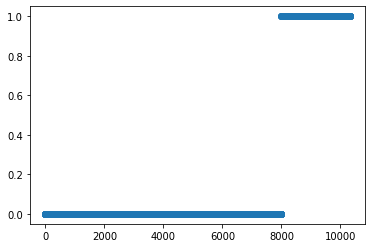

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(twitter['index'],twitter['label (depression result)'])

In [ ]:
zerolabel=twitter[twitter['label (depression result)']==0]

In [ ]:
onelabel=twitter[twitter['label (depression result)']==1]

In [ ]:
zerolabel=zerolabel.sample(frac=1)

In [ ]:
onelabel=onelabel.sample(frac=1)

In [ ]:
train=pd.concat([zerolabel[:(len(zerolabel)*3)//5],onelabel[:(len(onelabel)*3)//5]])

In [ ]:
train=train.sample(frac=1)

In [ ]:
train=train.drop(columns='index')

In [ ]:
train.reset_index(inplace=True)

In [ ]:
train=train.drop(columns='index')

In [ ]:
test=pd.concat([zerolabel[(len(zerolabel)*3)//5:],onelabel[(len(onelabel)*3)//5:]])

In [ ]:
test=test.sample(frac=1)

In [ ]:
test=test.drop(columns='index')
test.reset_index(inplace=True)
test=test.drop(columns='index')

In [ ]:
X_train=train.drop(columns=['label (depression result)'])
y_train=(train['label (depression result)'])
X_test=test.drop(columns=['label (depression result)'])
y_test=(test['label (depression result)'])

In [ ]:
X_train.reset_index(inplace=True)

In [ ]:
X_train

,index,message to examine
0,0,Aaaaayyyyy momma you trynna take a depression...
1,1,&quot;If U Seek Amy&quot; finally makes sense ...
2,2,Alkermes's depression drug is back on track af...
3,3,You just saved your Twitter soul.
4,4,Have a good friday night
...,...,...
6173,6173,mmm I'm so fuckin stressed out and my depressi...
6174,6174,"Anxiety, depression & pizza <Emoji: Slice of p..."
6175,6175,"Hanging out with Whitney, drinking margaritas,..."
6176,6176,"_marcella ngl i wanna meet him. i think you, m..."


In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(0, len(X_train)):
    review = re.sub('[^a-zA-Z]', ' ', X_train['message to examine'][i])
    review = review.lower()
    review = review.split()
    
    #review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
X_test.reset_index(inplace=True)

In [ ]:
corptest = []
for i in range(0, len(X_test)):
    review = re.sub('[^a-zA-Z]', ' ', X_test['message to examine'][i])
    review = review.lower()
    review = review.split()
    
    #review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corptest.append(review)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=8000,ngram_range=(1,3))
X_train = cv.fit_transform(corpus).toarray()
X_test=cv.transform(corptest).toarray()

In [ ]:
y_test=np.array(y_test)
y_train=np.array(y_train)

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()

In [ ]:
linear_clf.fit(X_train,y_train)

PassiveAggressiveClassifier()

In [ ]:
y_pred=linear_clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
accuracy_score(y_test,y_pred)

0.9973300970873786

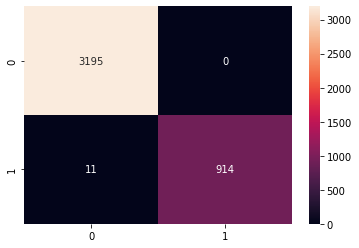

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.4g')

In [ ]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      3195\n           1       1.00      0.99      0.99       925\n\n    accuracy                           1.00      4120\n   macro avg       1.00      0.99      1.00      4120\nweighted avg       1.00      1.00      1.00      4120\n'

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [ ]:
classifier.fit(X_train,y_train)
y_np=classifier.predict(X_test)

In [ ]:
accuracy_score(y_test,y_np)

0.9228155339805825

In [ ]:
classification_report(y_test,y_np)

'              precision    recall  f1-score   support\n\n           0       0.91      1.00      0.95      3195\n           1       1.00      0.66      0.79       925\n\n    accuracy                           0.92      4120\n   macro avg       0.95      0.83      0.87      4120\nweighted avg       0.93      0.92      0.92      4120\n'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [ ]:
y_predictor=randomclassifier.predict(X_test)

In [ ]:
accuracy_score(y_test,y_predictor)

0.9978155339805825

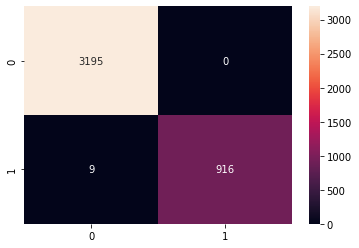

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_predictor),annot=True,fmt='.5g')

In [ ]:
classification_report(y_test,y_predictor)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      3195\n           1       1.00      0.99      1.00       925\n\n    accuracy                           1.00      4120\n   macro avg       1.00      1.00      1.00      4120\nweighted avg       1.00      1.00      1.00      4120\n'